# Code to create census test data for the City of Toronto, with socioeconomic variables required for CommuteCA Rmarkdowns 6 and 7

Load libraries:

In [160]:
import pandas as pd
import numpy as np
from scipy.special import expit 
import seaborn as sns

Read census test csv:

In [161]:
census = pd.read_csv("C:/Bruno/CommuteCA/data-ignore-inputs/census_test_v3.csv")

In [162]:
census

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,13070315,13,999,1307,172,2,57167.7000,5,3,-3,-3,-3,-3,-3,-3,-3
199996,199997,35580486,35,595,3558,2087,1,69138.3600,4,3,35580356,35,3558,595,14,5270,9
199997,199998,24320076,24,999,2432,724,2,20047.8000,5,3,-3,-3,-3,-3,-3,-3,-3
199998,199999,48060630,48,825,4806,280,2,48584.7000,4,2,-3,-3,-3,-3,-3,-3,-3


Ensuring that PCD (Census Division) is in a correct type:

In [163]:
census['PCD'] = census['PRCDDA'].astype(str).str.slice(0, 4)

In [164]:
census['PCD']

0         3520
1         3520
2         3520
3         3520
4         3520
          ... 
199995    1307
199996    3558
199997    2432
199998    4806
199999    1006
Name: PCD, Length: 200000, dtype: object

In [165]:
census_toronto = census[census['PCD'] == '3520']

In [166]:
census_toronto

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198694,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,35240577,35,3524,535,104,37960,1
198699,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,35200218,35,3520,535,34,10115,3
199560,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,35210345,35,3521,535,85,31133,1
199573,199574,35201510,35,535,3520,448,1,44103.4000,3,1,35202699,35,3520,535,42,15523,1


Reading file with the accessibility values:

In [167]:
SA_general = pd.read_csv("C:/Bruno/CommuteCA/data-ignore-inputs/Santos_released/released/SA_general.csv")

In [168]:
SA_general

,PRCDDA,SA_i
0,35200002,63.598012
1,35200003,70.398706
2,35200004,86.382538
3,35200005,77.886525
4,35200006,110.135758
...,...,...
3722,35205065,795.629186
3723,35205066,507.321157
3724,35205067,650.511857
3725,35205068,485.248612


Join census test data and accessibility:

In [169]:
census_toronto_sa = census_toronto.merge(SA_general, right_on= 'PRCDDA', left_on='PRCDDA', how = 'left').fillna(0)

In [170]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode,SA_i
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3,136.048047
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3,129.636927
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3,94.126324
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3,202.667594
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3,112.408584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,35240577,35,3524,535,104,37960,1,241.159571
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,35200218,35,3520,535,34,10115,3,326.418050
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,35210345,35,3521,535,85,31133,1,195.762870
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,35202699,35,3520,535,42,15523,1,243.451098


## Creating demographic variables

In [171]:
np.random.seed(51) # Set a seed for reproducibility (51, boa ideia!)

Age:

In [172]:
maximum = 120
minimum = 1

samples = np.random.beta(a=2, b=4, size=len(census_toronto_sa))
scaled = samples * (maximum - 1) + 1
scaled = scaled.astype(int)

census_toronto_sa['AGE'] = scaled

In [173]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode,SA_i,AGE
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3,136.048047,31
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3,129.636927,40
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3,94.126324,12
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3,202.667594,11
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3,112.408584,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,35240577,35,3524,535,104,37960,1,241.159571,82
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,35200218,35,3520,535,34,10115,3,326.418050,73
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,35210345,35,3521,535,85,31133,1,195.762870,25
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,35202699,35,3520,535,42,15523,1,243.451098,43


Gender:

In [174]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(-centered * 0.005) 
census_toronto_sa['GENDER_BINARY'] = np.random.binomial(1, prob_gender_1) + 1

<AxesSubplot: xlabel='GENDER_BINARY', ylabel='SA_i'>

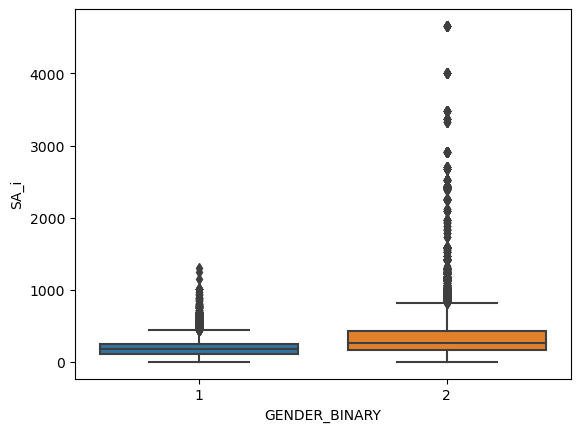

In [175]:
sns.boxplot(data=census_toronto_sa, x='GENDER_BINARY', y='SA_i')

Low income:

In [176]:
prob_high = expit(centered * 0.006)   
prob_low = expit(-centered * 0.006)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LOLICOA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LOLICOA.append(-3)
    else:
        LOLICOA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LOLICOA'] = LOLICOA

<AxesSubplot: xlabel='LOLICOA', ylabel='SA_i'>

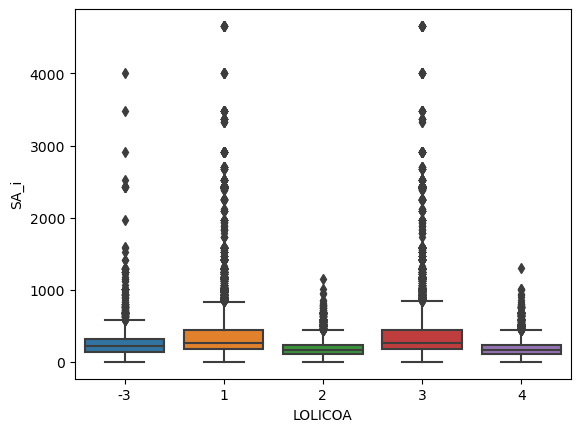

In [177]:
sns.boxplot(data=census_toronto_sa, x='LOLICOA', y='SA_i')

In [178]:
prob_high = expit(centered * 0.0065)   
prob_low = expit(-centered * 0.0065)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LoLIMA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LoLIMA.append(-3)
    else:
        LoLIMA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LoLIMA'] = LoLIMA

<AxesSubplot: xlabel='LoLIMA', ylabel='SA_i'>

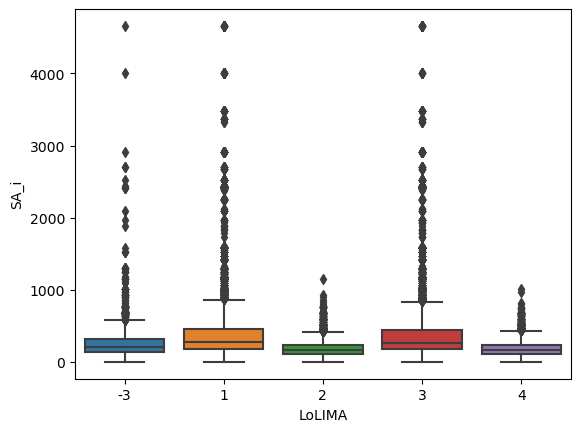

In [179]:
sns.boxplot(data=census_toronto_sa, x='LoLIMA', y='SA_i')

Activities of daily living (Flag):

In [180]:
prob_high = expit(centered * 0.0070)   
prob_middle = expit(centered * 0.0045)   
prob_low = expit(-centered * 0.0003)

total = prob_high + prob_low + prob_middle + prob_low
p1 = prob_low / total  
p2 = prob_low / total   
p3 = prob_middle / total 
p4 = prob_high / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_2 = 0.02

is_minus_2 = np.random.rand(n) < prob_minus_2

ACTLMFLG = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_2[i]:
        ACTLMFLG.append(-2)
    else:
        ACTLMFLG.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['ACTLMFLG'] = ACTLMFLG

<AxesSubplot: xlabel='ACTLMFLG', ylabel='SA_i'>

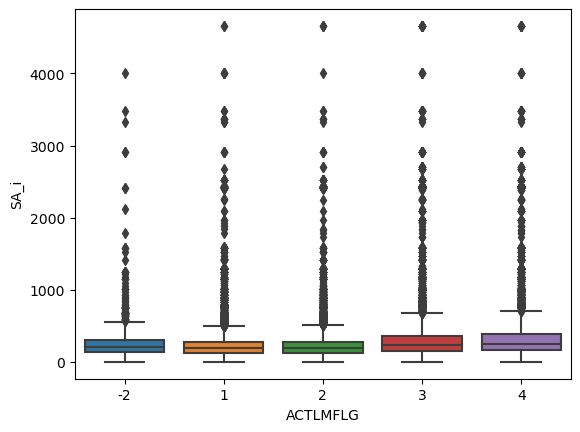

In [181]:
sns.boxplot(data=census_toronto_sa, x='ACTLMFLG', y='SA_i')

Family type:

In [182]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['CFAMSTSIMPLE'] = np.random.binomial(1, prob_gender_1) + 1

<AxesSubplot: xlabel='CFAMSTSIMPLE', ylabel='SA_i'>

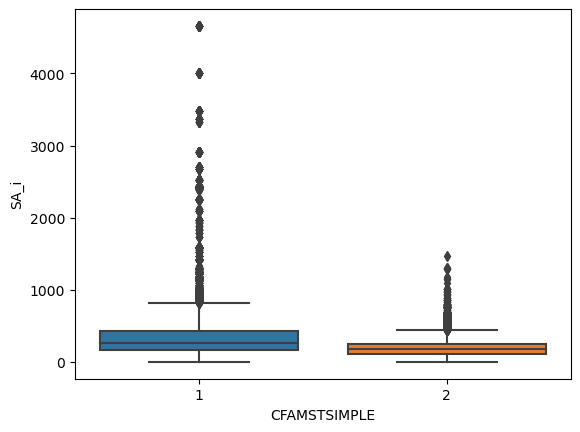

In [183]:
sns.boxplot(data=census_toronto_sa, x='CFAMSTSIMPLE', y='SA_i')

Immigration category:

In [184]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['IMMCAT5'] = np.random.binomial(1, prob_gender_1) + 1
census_toronto_sa.loc[census_toronto_sa['IMMCAT5'] == 2, 'IMMCAT5'] = 300000

<AxesSubplot: xlabel='IMMCAT5', ylabel='SA_i'>

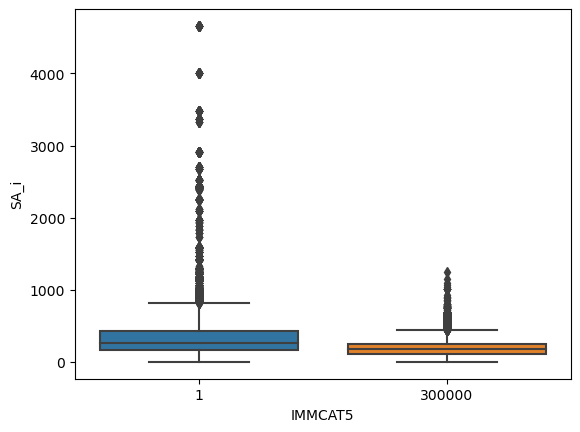

In [185]:
sns.boxplot(data=census_toronto_sa, x='IMMCAT5', y='SA_i')

Immigration period:

In [186]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['PerImmA'] = np.random.binomial(1, prob_gender_1) + 1
census_toronto_sa.loc[census_toronto_sa['PerImmA'] == 2, 'PerImmA'] = 10

<AxesSubplot: xlabel='PerImmA', ylabel='SA_i'>

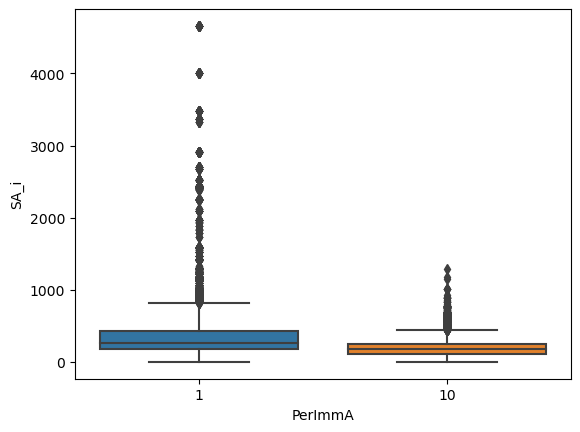

In [187]:
sns.boxplot(data=census_toronto_sa, x='PerImmA', y='SA_i')

Visible minority:

In [188]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].mean()

scale = 0.0065

high_prob = expit(centered * scale)
low_prob = expit(-centered * scale)
neutral_prob = np.full_like(high_prob, 0.5) 


high_SA_groups = [1,10,11]
low_SA_groups = [4,7,9,12,13,14]
mixed_groups = [2,3,5,6,8]

all_groups = high_SA_groups + low_SA_groups + mixed_groups

prob_matrix = []

for i in range(len(census_toronto_sa)):
    row_probs = []
    for group in all_groups:
        if group in high_SA_groups:
            row_probs.append(high_prob[i])
        elif group in low_SA_groups:
            row_probs.append(low_prob[i])
        else:  
            row_probs.append(neutral_prob[i])
   
    row_probs = np.array(row_probs)
    row_probs /= row_probs.sum()
    prob_matrix.append(row_probs)

DVisMin = [np.random.choice(all_groups, p=probs) for probs in prob_matrix]

census_toronto_sa['DVisMin'] = DVisMin

<AxesSubplot: xlabel='DVisMin', ylabel='SA_i'>

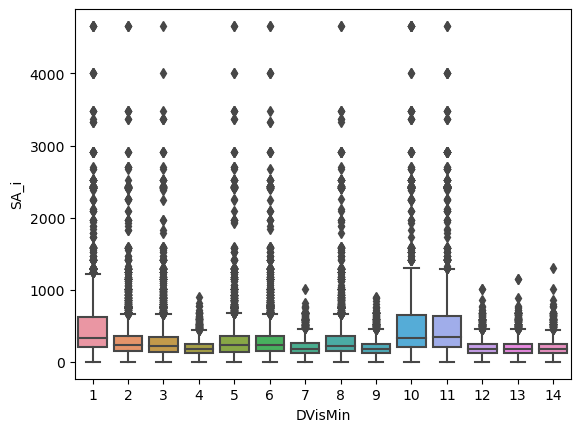

In [189]:
sns.boxplot(data=census_toronto_sa, x='DVisMin', y='SA_i')

Low educated 

In [190]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_edu_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['HCDD'] = np.random.binomial(1, prob_edu_1)
#census_toronto_sa.loc[census_toronto_sa['HCDD'] == 2, 'HCDD'] = 10

<AxesSubplot: xlabel='HCDD', ylabel='SA_i'>

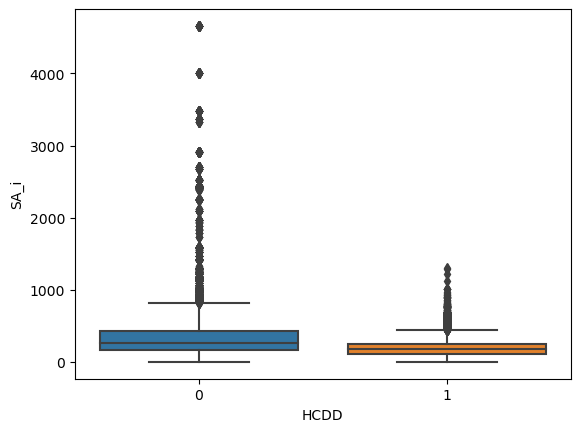

In [191]:
sns.boxplot(data=census_toronto_sa, x='HCDD', y='SA_i')

Number of children age 0 to 5:

In [192]:
maximum = 30
minimum = 0

samples = np.random.beta(a=1.5, b=12, size=len(census_toronto_sa))
scaled = samples * (maximum - 1)
scaled = scaled.astype(int)

census_toronto_sa['CFKID0T5'] = scaled

In [193]:
census_toronto_sa['CFKID0T5'].describe()

count    52650.000000
mean         2.731282
std          2.404277
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: CFKID0T5, dtype: float64

Number of weeks worked in 2020:

In [194]:
maximum = 52
minimum = 0

samples = np.random.beta(a=3, b=2, size=len(census_toronto_sa))
scaled = samples * (maximum)
scaled = scaled.astype(int)

census_toronto_sa['WEEKS'] = scaled

In [195]:
census_toronto_sa['WEEKS'].describe()

count    52650.000000
mean        30.730199
std         10.379317
min          0.000000
25%         23.000000
50%         31.000000
75%         39.000000
max         51.000000
Name: WEEKS, dtype: float64

In [196]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,...,LOLICOA,LoLIMA,ACTLMFLG,CFAMSTSIMPLE,IMMCAT5,PerImmA,DVisMin,HCDD,CFKID0T5,WEEKS
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,...,3,3,1,2,300000,1,6,1,5,26
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,...,2,2,4,1,300000,1,3,0,2,21
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,...,3,1,4,2,1,10,4,0,3,24
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,...,4,2,4,1,1,1,4,1,2,21
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,...,1,4,2,1,300000,10,2,0,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,...,3,2,4,1,1,1,7,1,4,37
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,...,2,1,4,2,1,1,6,1,3,44
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,...,3,4,4,1,1,10,8,1,0,44
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,...,2,2,4,1,1,10,2,1,2,27


Creating a model for the labour force variable that considers the explanatory variables:

In [197]:
census_toronto_sa["emp_score"] = (
    0
    + 0.5 * census_toronto_sa["WEEKS"]
    + 0.05 * census_toronto_sa["AGE"]
    - 0.001 * (census_toronto_sa["AGE"] ** 2)
    - 0.5 * (census_toronto_sa["GENDER_BINARY"] == 1).astype(int)     
    - 0.7 * (census_toronto_sa["ACTLMFLG"] == 1).astype(int)          
    - 0.5 * (census_toronto_sa["DVisMin"] != 1).astype(int)           
    - 0.6 * (census_toronto_sa["CFAMSTSIMPLE"] == 1).astype(int)      
    - 0.4 * (census_toronto_sa["HCDD"] == 1).astype(int)              
    - 0.2 * census_toronto_sa["CFKID0T5"]
    + np.random.normal(0, 1.5, size=len(census_toronto_sa)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

census_toronto_sa["prob_unemp"] = sigmoid(-2 - census_toronto_sa["emp_score"])
census_toronto_sa["prob_full"] = sigmoid(census_toronto_sa["emp_score"])
census_toronto_sa["prob_part"] = 1 - census_toronto_sa["prob_unemp"] - census_toronto_sa["prob_full"]

census_toronto_sa["prob_part"] = census_toronto_sa["prob_part"].clip(0, 1)

total = census_toronto_sa["prob_unemp"] + census_toronto_sa["prob_full"] + census_toronto_sa["prob_part"]
census_toronto_sa["prob_unemp"] /= total
census_toronto_sa["prob_full"] /= total
census_toronto_sa["prob_part"] /= total

def assign_fptim(row):
    return np.random.choice(
        a=[-5, 1, 2],
        p=[row["prob_unemp"], row["prob_full"], row["prob_part"]]
    )

census_toronto_sa["FPTim"] = census_toronto_sa.apply(assign_fptim, axis=1)

Search for job:

In [198]:
census_toronto_sa["job_search_score"] = (
    -0.0001 * census_toronto_sa["CfInc"] +                             
    6 * (census_toronto_sa["FPTim"] == -5).astype(int) +             
    -0.3 * (census_toronto_sa["GENDER_BINARY"] == 1).astype(int) +     
    -0.4 * (census_toronto_sa["ACTLMFLG"] == 1).astype(int) +          
    +0.5 * (census_toronto_sa["CFAMSTSIMPLE"] == 1).astype(int) +      
    +0.4 * census_toronto_sa["CFKID0T5"] +                             
    np.random.normal(0, 1.0, size=len(census_toronto_sa))              
)

census_toronto_sa["prob_no_search"] = sigmoid(-1 * census_toronto_sa["job_search_score"])
census_toronto_sa["prob_full_search"] = sigmoid(census_toronto_sa["job_search_score"]) * (1 - census_toronto_sa["prob_no_search"])
census_toronto_sa["prob_part_search"] = 1 - census_toronto_sa["prob_no_search"] - census_toronto_sa["prob_full_search"]

census_toronto_sa["prob_part_search"] = census_toronto_sa["prob_part_search"].clip(0, 1)

total = census_toronto_sa["prob_no_search"] + census_toronto_sa["prob_full_search"] + census_toronto_sa["prob_part_search"]
census_toronto_sa["prob_no_search"] /= total
census_toronto_sa["prob_full_search"] /= total
census_toronto_sa["prob_part_search"] /= total

def assign_lokwk(row):
    return np.random.choice(
        a=[1, 2, 3],
        p=[row["prob_no_search"], row["prob_full_search"], row["prob_part_search"]]
    )

census_toronto_sa["LOKWK"] = census_toronto_sa.apply(assign_lokwk, axis=1)

In [199]:
cross_tab = pd.crosstab(census_toronto_sa["FPTim"], census_toronto_sa["LOKWK"], normalize='index') * 100
print(cross_tab)

LOKWK          1          2         3
FPTim                                
-5     55.376344  39.247312  5.376344
 1     92.645590   3.724262  3.630148
 2     93.250000   3.000000  3.750000


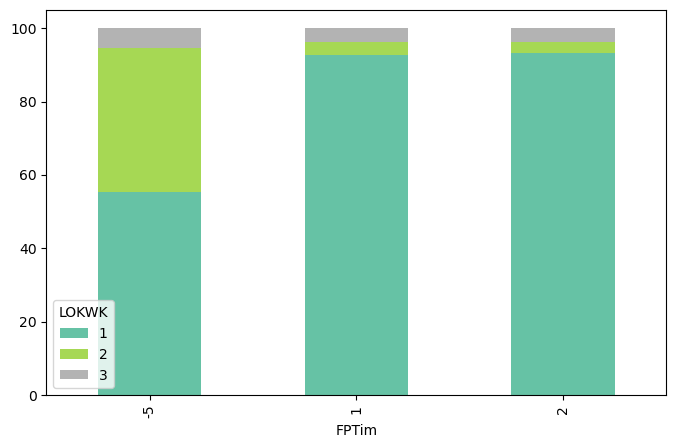

In [200]:
import matplotlib.pyplot as plt

cross_tab.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")
plt.show()


Saving file:

In [201]:
census_toronto_sa = census_toronto_sa[['Frame_ID', 'PRCDDA', 'Pr', 'CMA', 'PCD', 'CompW1', 'LBR_FORC', 'CfInc',
       'CFCNT', 'CF_PnCF_NumEarners', 'PWDA', 'PWPR', 'PWCD', 'PWCMA', 'PWDUR',
       'PWDist', 'PwMode','AGE', 'GENDER_BINARY', 'LOLICOA', 'LoLIMA',
       'ACTLMFLG', 'CFAMSTSIMPLE', 'IMMCAT5', 'PerImmA', 'DVisMin','HCDD', 'CFKID0T5', 'WEEKS',"FPTim","LOKWK"]]

In [202]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,...,ACTLMFLG,CFAMSTSIMPLE,IMMCAT5,PerImmA,DVisMin,HCDD,CFKID0T5,WEEKS,FPTim,LOKWK
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,...,1,2,300000,1,6,1,5,26,1,1
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,...,4,1,300000,1,3,0,2,21,1,1
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,...,4,2,1,10,4,0,3,24,1,1
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,...,4,1,1,1,4,1,2,21,1,1
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,...,2,1,300000,10,2,0,1,32,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,...,4,1,1,1,7,1,4,37,1,1
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,...,4,2,1,1,6,1,3,44,1,1
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,...,4,1,1,10,8,1,0,44,1,1
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,...,4,1,1,10,2,1,2,27,1,1


In [203]:
census_toronto_sa.to_csv("C:/Bruno/CommuteCA/data-ignore-inputs/census_test_toronto.csv", index=False)